<a href="https://colab.research.google.com/github/AiMathguy/Credit-Fraud-Detection/blob/main/ITDPA3_Neural_X_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Imports

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## 2. Loading and Understanding the Dataset

In [41]:
#reading the dataset
Train_data = pd.read_csv("/content/fraudTrain.csv",delimiter=',')

## 3. Data Overview and Understanding the Dataset

In [42]:
Train_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [43]:
#The shape of the dataframe loaded
Train_data.shape

(23367, 23)

In [44]:
# Dataframe data types
Train_data.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [45]:
#data types count in the dataframe
Train_data.dtypes.value_counts()

,count
object,12
float64,6
int64,5


In [46]:
#dataframe information
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23367 entries, 0 to 23366
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             23367 non-null  int64  
 1   trans_date_trans_time  23367 non-null  object 
 2   cc_num                 23367 non-null  int64  
 3   merchant               23367 non-null  object 
 4   category               23367 non-null  object 
 5   amt                    23367 non-null  float64
 6   first                  23367 non-null  object 
 7   last                   23367 non-null  object 
 8   gender                 23367 non-null  object 
 9   street                 23367 non-null  object 
 10  city                   23367 non-null  object 
 11  state                  23367 non-null  object 
 12  zip                    23367 non-null  int64  
 13  lat                    23367 non-null  float64
 14  long                   23367 non-null  float64
 15  ci

In [47]:
#NUmber of null values found in the dataset
Train_data.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [48]:
#Remove duplicates found in the dataset
Train_data.drop_duplicates()
Train_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


## 4. Datetime Feature Engineering

In [49]:
Train_data["trans_date_trans_time"] = pd.to_datetime(Train_data["trans_date_trans_time"])

# Extract hour, day, month, weekday
Train_data['hour'] = Train_data['trans_date_trans_time'].dt.hour
Train_data['day'] = Train_data['trans_date_trans_time'].dt.day
Train_data['month'] = Train_data['trans_date_trans_time'].dt.month
Train_data['weekday'] = Train_data['trans_date_trans_time'].dt.day_name()

# Separate into date and time
Train_data["trans_date"] = Train_data["trans_date_trans_time"].dt.date
Train_data["trans_time"] = Train_data["trans_date_trans_time"].dt.time

# Drop original column
Train_data = Train_data.drop(columns=["trans_date_trans_time"])

# Reorder columns
col_reag = ["Unnamed: 0", "trans_date", "trans_time", "hour", "day", "month", "weekday"] + [c for c in Train_data.columns if c not in
                                                         ["Unnamed: 0", "trans_date", "trans_time", "hour",	"day",	"month",
                                                          "weekday"]]
Train_data = Train_data[col_reag]
Train_data.head(5)

,Unnamed: 0,trans_date,trans_time,hour,day,month,weekday,cc_num,merchant,category,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01,00:00:18,0,1,1,Tuesday,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01,00:00:44,0,1,1,Tuesday,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01,00:00:51,0,1,1,Tuesday,38859492057661,fraud_Lind-Buckridge,entertainment,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01,00:01:16,0,1,1,Tuesday,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01,00:03:06,0,1,1,Tuesday,375534208663984,fraud_Keeling-Crist,misc_pos,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [50]:
# Convert the dob column to datetime
Train_data["dob"] = pd.to_datetime(Train_data["dob"], errors="coerce")

# Pick trans_date for age calculation
reference_date = Train_data["trans_date"].max()
reference_date = pd.to_datetime(reference_date)

# Creating a Age column
Train_data["age"] = (reference_date - Train_data["dob"]).dt.days // 365

# Drop original dob column
Train_data = Train_data.drop("dob", axis=1)
Train_data.head(5)

,Unnamed: 0,trans_date,trans_time,hour,day,month,weekday,cc_num,merchant,category,...,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,0,2019-01-01,00:00:18,0,1,1,Tuesday,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,...,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0,30
1,1,2019-01-01,00:00:44,0,1,1,Tuesday,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,...,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0,40
2,2,2019-01-01,00:00:51,0,1,1,Tuesday,38859492057661,fraud_Lind-Buckridge,entertainment,...,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0,57
3,3,2019-01-01,00:01:16,0,1,1,Tuesday,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,...,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0,52
4,4,2019-01-01,00:03:06,0,1,1,Tuesday,375534208663984,fraud_Keeling-Crist,misc_pos,...,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0,32


## 5. Descriptive Statistics

In [51]:
Train_data.describe()

,Unnamed: 0,hour,day,month,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,23367.000000,23367.000000,23367.000000,23367.0,2.336700e+04,23367.000000,23367.000000,23367.000000,23367.000000,2.336700e+04,2.336700e+04,23367.000000,23367.000000,23366.000000,23367.000000
mean,11683.000000,12.610220,7.456541,1.0,4.219398e+17,71.206334,48786.764326,38.514941,-90.269911,9.064923e+04,1.325981e+09,38.517688,-90.270958,0.008388,45.043780
std,6745.616206,6.783585,4.039180,0.0,1.315906e+18,147.287009,27024.707520,5.111352,14.014022,3.013055e+05,3.483494e+05,5.139009,14.033250,0.091204,17.431305
min,0.000000,0.000000,1.000000,1.0,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.629875,0.000000,13.000000
25%,5841.500000,7.000000,4.000000,1.0,1.800429e+14,9.660000,25526.000000,34.668900,-96.809400,7.430000e+02,1.325703e+09,34.759848,-96.966720,0.000000,32.000000
50%,11683.000000,13.000000,7.000000,1.0,3.519233e+15,48.300000,48088.000000,39.319900,-87.476900,2.501000e+03,1.325968e+09,39.325464,-87.436253,0.000000,43.000000
75%,17524.500000,18.000000,11.000000,1.0,4.642255e+15,83.550000,72042.000000,41.825000,-80.124800,2.112500e+04,1.326288e+09,41.893182,-80.137093,0.000000,56.000000
max,23366.000000,23.000000,14.000000,1.0,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.326564e+09,66.659242,-66.967742,1.000000,94.000000


## 6. Variable Distribution and Data Visualization

In [52]:
Train_data["is_fraud"].value_counts()

,count
is_fraud,
0.0,23170
1.0,196


Text(0.5, 1.0, 'Fraud Vs Non-Fraud')

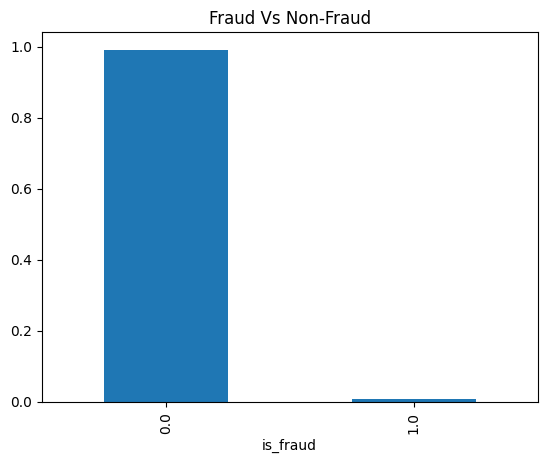

In [53]:
Train_data["is_fraud"].value_counts(normalize=True).plot(kind="bar")
plt.title("Fraud Vs Non-Fraud")

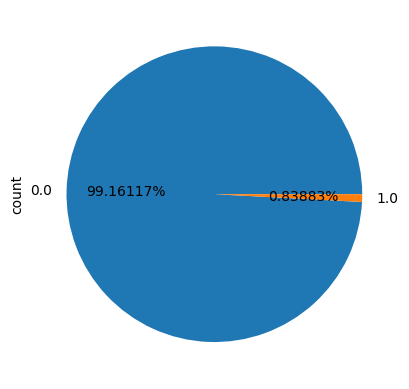

In [54]:
Train_data["is_fraud"].value_counts().plot.pie(autopct = "%1.5f%%")
plt.show()

In [55]:
#There are 99.42% Normal transaction and 0.58% of fraudulent transactions, this means the dataset in imbalanced

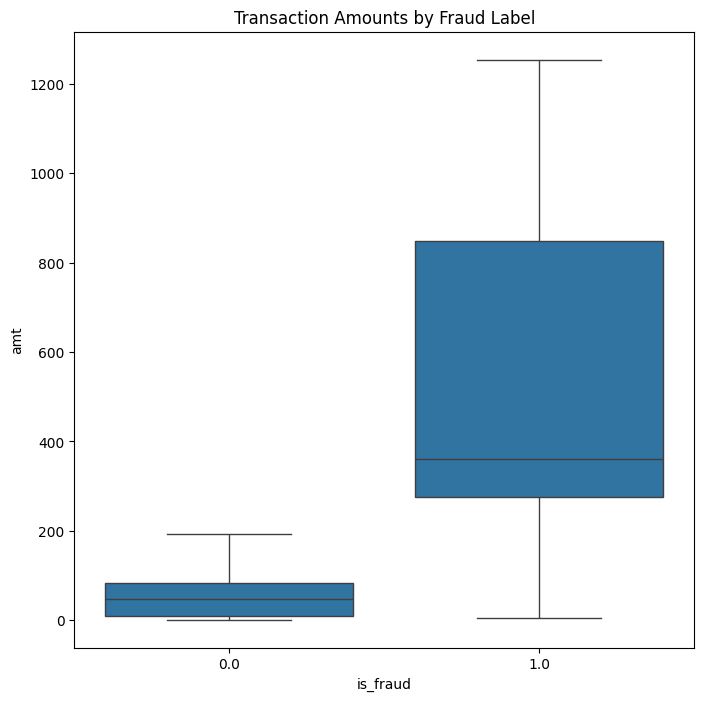

In [56]:
#boxplot of both the Amount and is_fraud column
plt.figure(figsize=(8,8))
sns.boxplot(x="is_fraud", y="amt", data=Train_data, showfliers=False)
plt.title("Transaction Amounts by Fraud Label")
plt.show()

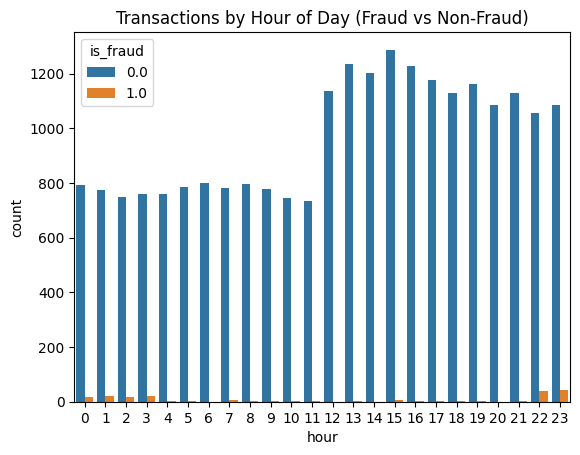

In [57]:
#Fraudulent and non-fradulent transactions based on the hour of the day
sns.countplot(x='hour', data=Train_data, hue='is_fraud')
plt.title("Transactions by Hour of Day (Fraud vs Non-Fraud)")
plt.show()

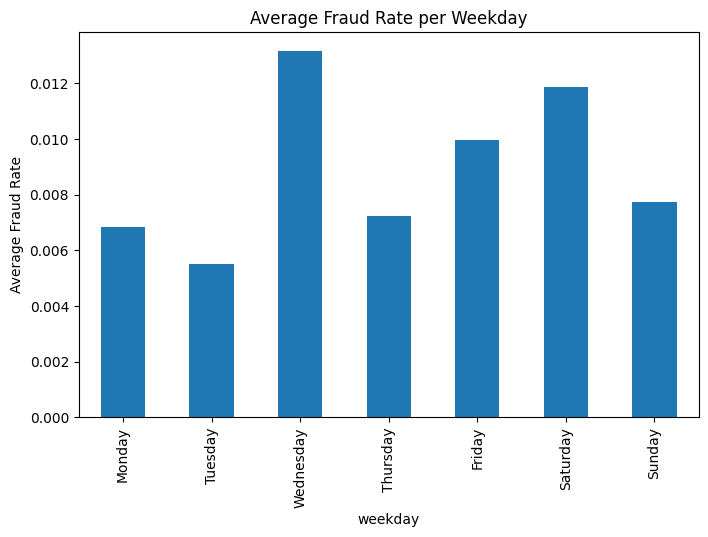

In [58]:
# Define weekday order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Make weekday a categorical with proper order
Train_data['weekday'] = pd.Categorical(Train_data['weekday'], categories=weekday_order, ordered=True)

# Group by weekday and calculate mean fraud rate
fraud_by_day = Train_data.groupby('weekday')['is_fraud'].mean()

# Average fraud rate per day
fraud_by_day.plot(kind='bar', figsize=(8,5))
plt.title("Average Fraud Rate per Weekday")
plt.ylabel("Average Fraud Rate")
plt.show()

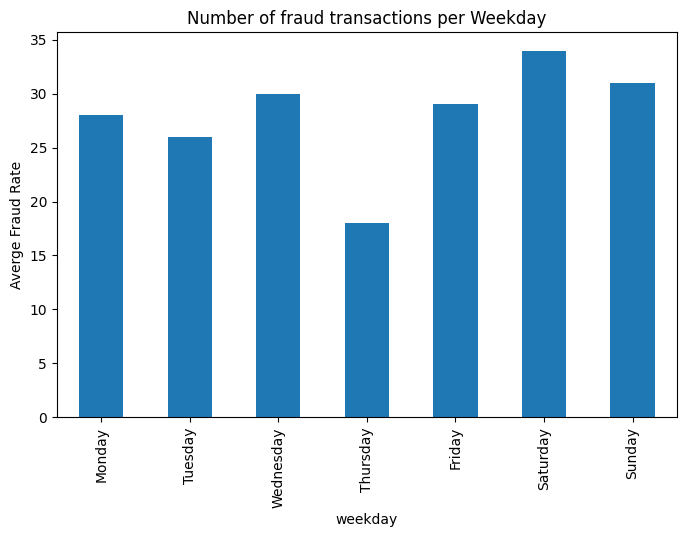

In [59]:
fraud_counts = Train_data.groupby('weekday')['is_fraud'].sum()
fraud_counts.plot(kind='bar', figsize=(8,5))
plt.title("Number of fraud transactions per Weekday")
plt.ylabel("Averge Fraud Rate")
plt.show()

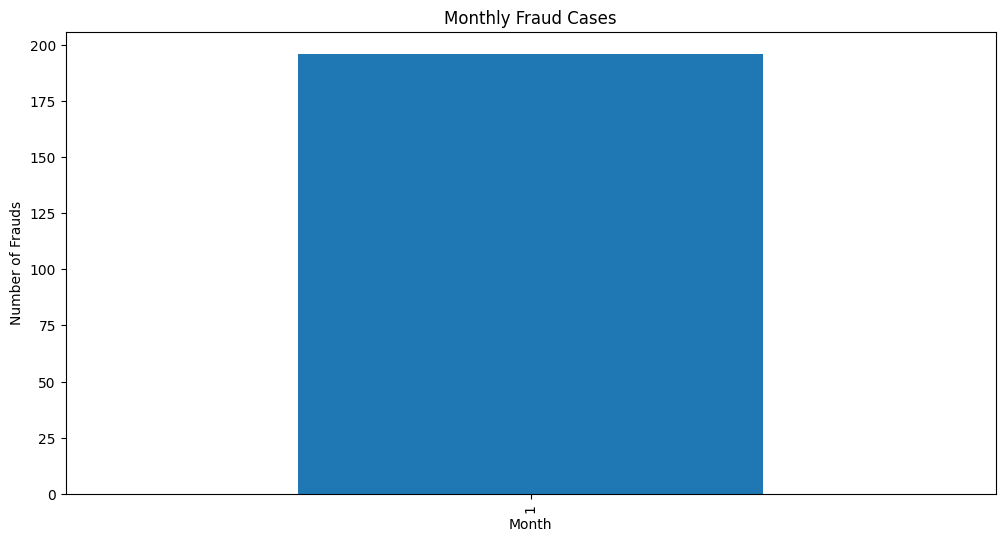

In [60]:
# Fraud cases each month
monthly_fraud = Train_data.groupby('month')['is_fraud'].sum()
monthly_fraud.plot(kind='bar', figsize=(12,6))
plt.title("Monthly Fraud Cases")
plt.xlabel("Month")
plt.ylabel("Number of Frauds")
plt.show()

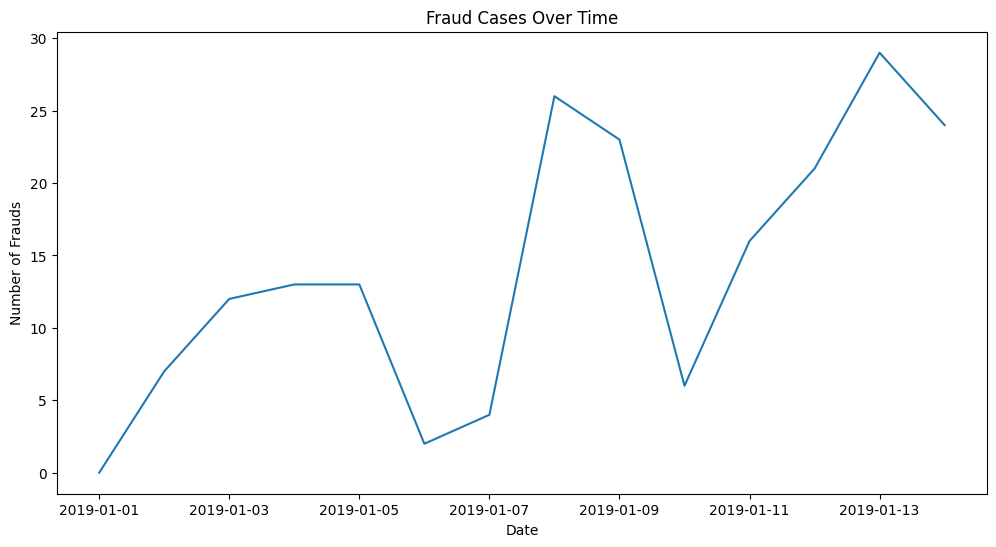

In [61]:
#Fraud cases over time
fraud_trend = Train_data.groupby("trans_date")["is_fraud"].sum()
plt.figure(figsize=(12,6))
fraud_trend.plot()
plt.title("Fraud Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Frauds")
plt.show()

In [62]:
#Storing fraud and non-fraud transactions
Train_data_nonfraud = Train_data[Train_data.is_fraud == 0]
Train_data_fraud = Train_data[Train_data.is_fraud == 1]

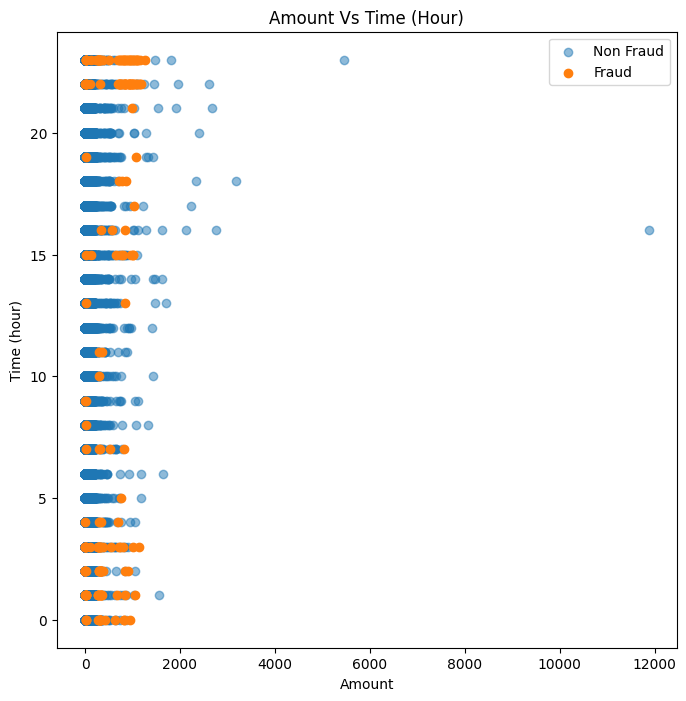

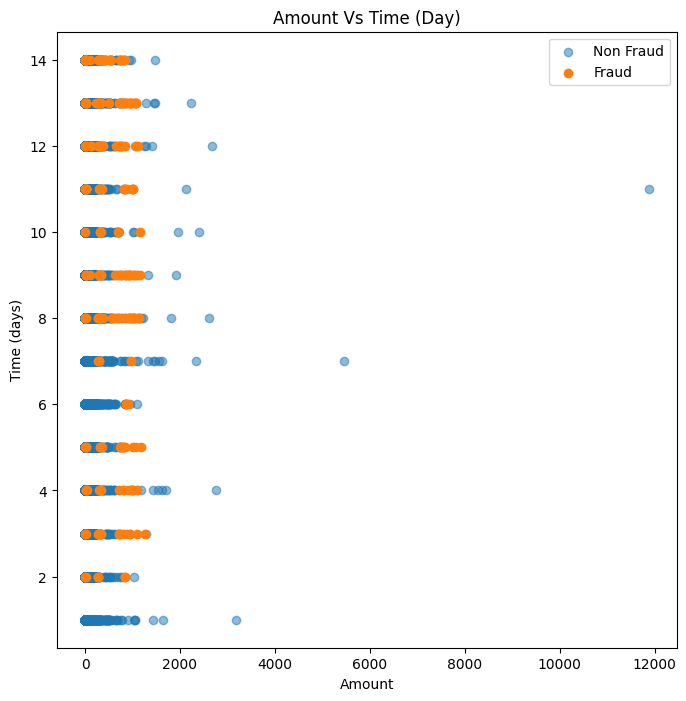

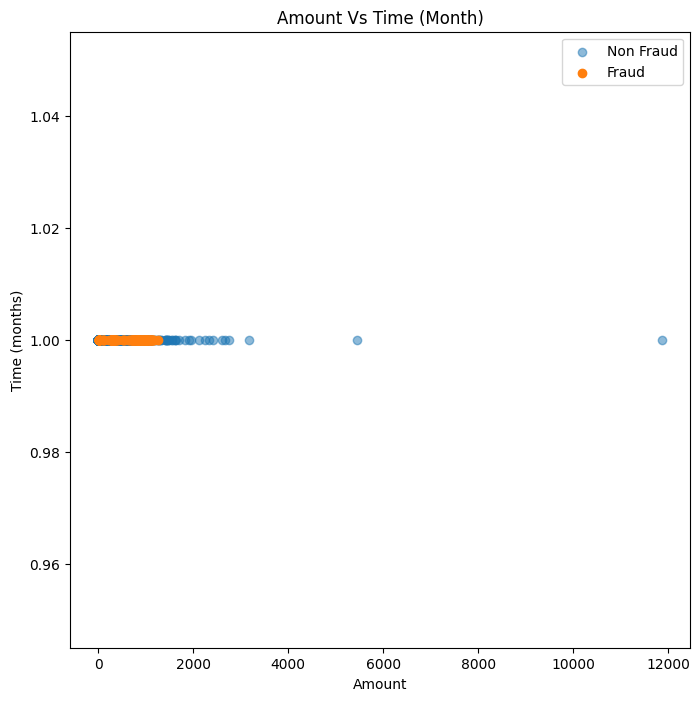

In [63]:
# Scatter plot for Amount vs Time(Hour)
fig = plt.figure(figsize=(8,8))
plt.scatter(Train_data_nonfraud.amt, Train_data_nonfraud.hour, alpha=0.5, label='Non Fraud')
plt.scatter(Train_data_fraud.amt, Train_data_fraud.hour, alpha=1, label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Time (hour)')
plt.title('Amount Vs Time (Hour)')
plt.legend()
plt.show()

# Scatter plot for Amount vs Time(Day)
fig = plt.figure(figsize=(8,8))
plt.scatter(Train_data_nonfraud.amt, Train_data_nonfraud.day, alpha=0.5, label='Non Fraud')
plt.scatter(Train_data_fraud.amt, Train_data_fraud.day, alpha=1, label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Time (days)')
plt.title('Amount Vs Time (Day)')
plt.legend()
plt.show()

# Scatter plot for Amount vs Time(Month)
fig = plt.figure(figsize=(8,8))
plt.scatter(Train_data_nonfraud.amt, Train_data_nonfraud.month, alpha=0.5, label='Non Fraud')
plt.scatter(Train_data_fraud.amt, Train_data_fraud.month, alpha=1, label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Time (months)')
plt.title('Amount Vs Time (Month)')
plt.legend()
plt.show()

In [64]:
#finding the average of fraud transaction per category
fraud_cat = Train_data.groupby("category")["is_fraud"].mean().sort_values(ascending=False)
fraud_cat

,is_fraud
category,
grocery_pos,0.023989
shopping_net,0.023099
misc_net,0.022444
shopping_pos,0.009082
gas_transport,0.007894
grocery_net,0.004837
misc_pos,0.004307
travel,0.004298
entertainment,0.003639


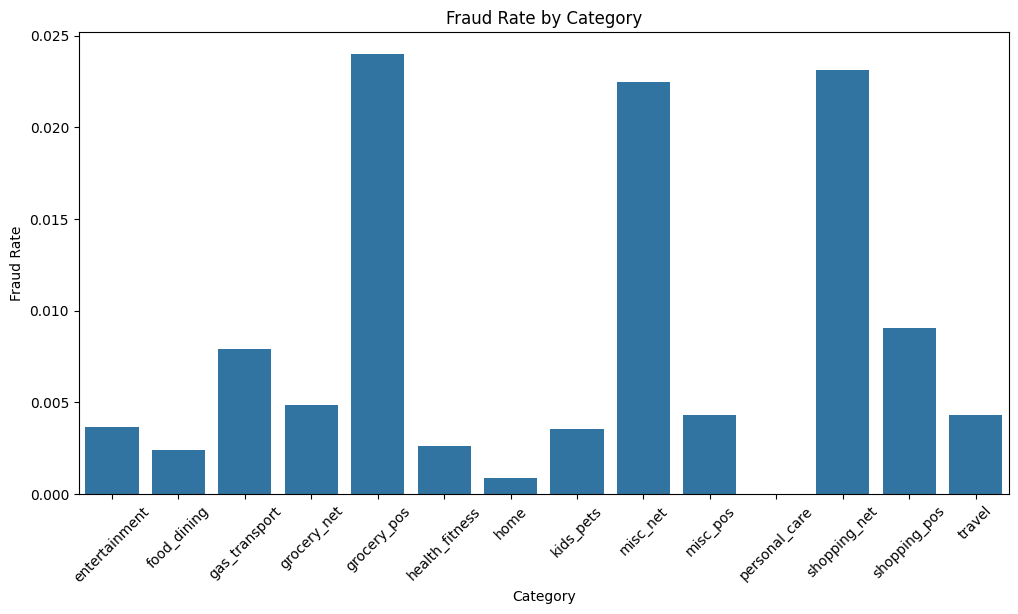

In [65]:
#Fraud rate per category
plt.figure(figsize=(12,6))
fraud_rate_by_cat = Train_data.groupby("category")["is_fraud"].mean()
sns.barplot(x=fraud_rate_by_cat.index, y=fraud_rate_by_cat.values)
plt.xticks(rotation=45)
plt.title("Fraud Rate by Category")
plt.ylabel("Fraud Rate")
plt.xlabel("Category")
plt.show()

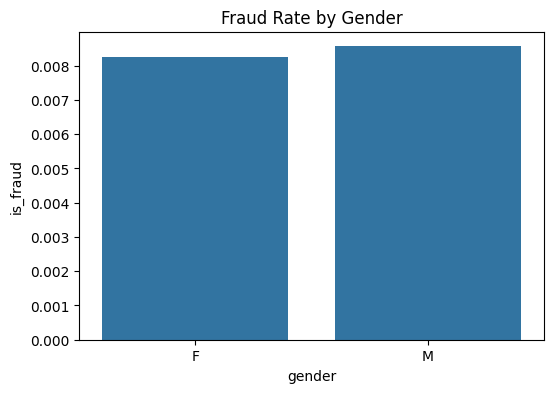

In [66]:
#Fraud cases for each gender
plt.figure(figsize=(6,4))
sns.barplot(x="gender", y="is_fraud", data=Train_data, estimator=lambda x: sum(x)/len(x), errorbar=None)
plt.title("Fraud Rate by Gender")
plt.show()

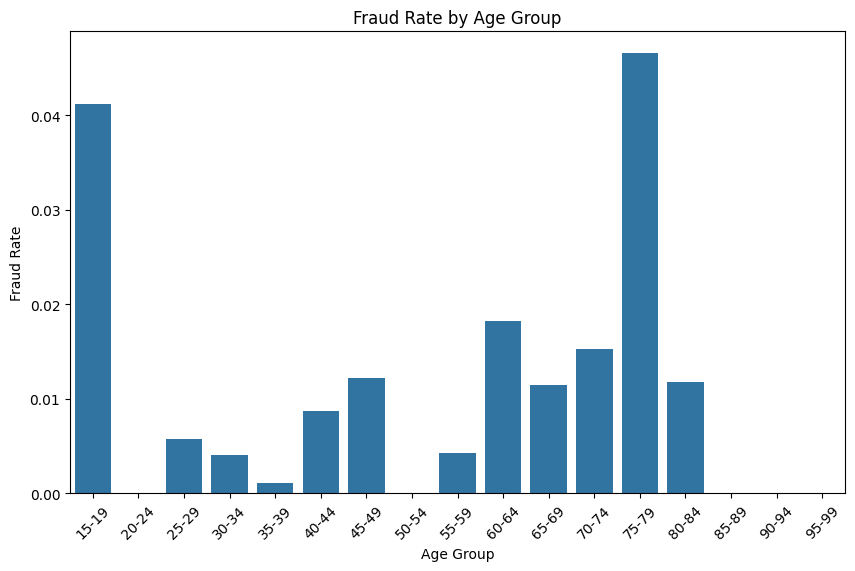

In [67]:
#Fraud cases per age group
# Define age bins and labels
bins = [15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99]
labels = ["15-19","20-24","25-29","30-34","35-39","40-44","45-49","50-54",
          "55-59","60-64","65-69","70-74","75-79","80-84","85-89","90-94","95-99"]

# Create a new column for age groups
Train_data['age_group'] = pd.cut(Train_data['age'], bins=bins, labels=labels, right=True)

# Plot fraud rate by age group
plt.figure(figsize=(10,6))
sns.barplot(
    x="age_group",
    y="is_fraud",
    data=Train_data,
    estimator=lambda x: sum(x)/len(x),
    errorbar=None
)
plt.title("Fraud Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.show()

In [68]:
#number of times each credit card number occurs
Train_data['cc_num'].value_counts()

,count
cc_num,
3576431665303017,79
342952484382519,73
3575789281659026,70
2720433095629877,65
6011367958204270,64
...,...
2714019737356678,3
676234256292,3
3540862542587229,3


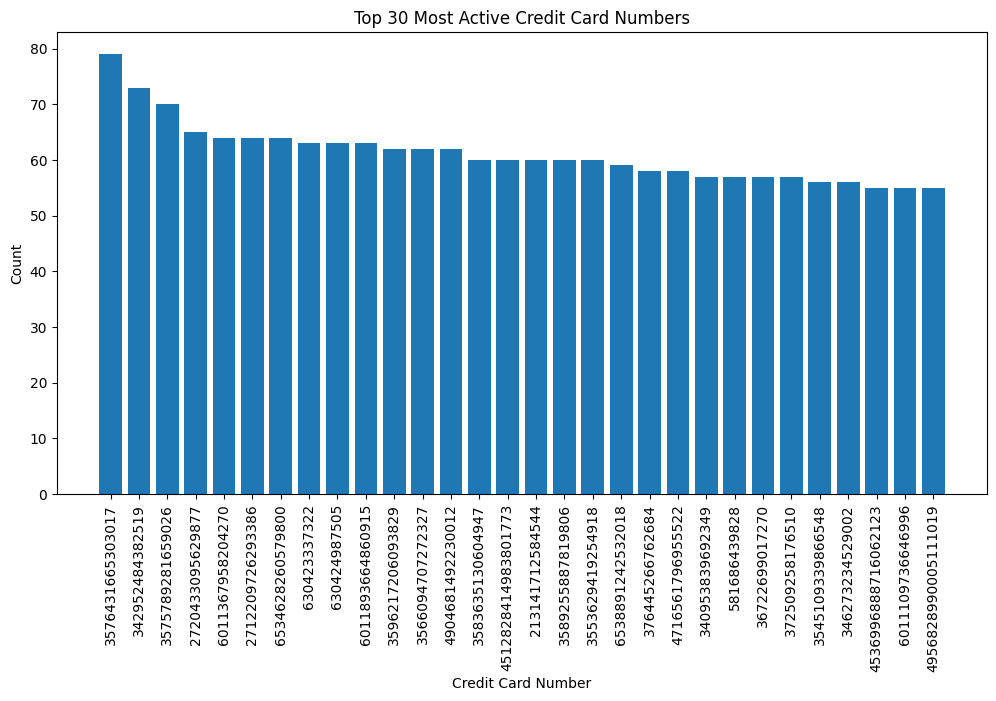

In [69]:
#top 30 credit card numbers that appear
cc_counts = Train_data['cc_num'].value_counts().reset_index()
cc_counts.columns = ['cc_num', 'count']

top30 = cc_counts.head(30)

plt.figure(figsize=(12,6))
plt.bar(top30['cc_num'].astype(str), top30['count'])

plt.xlabel("Credit Card Number")
plt.ylabel("Count")
plt.title("Top 30 Most Active Credit Card Numbers")
plt.xticks(rotation=90)
plt.show()

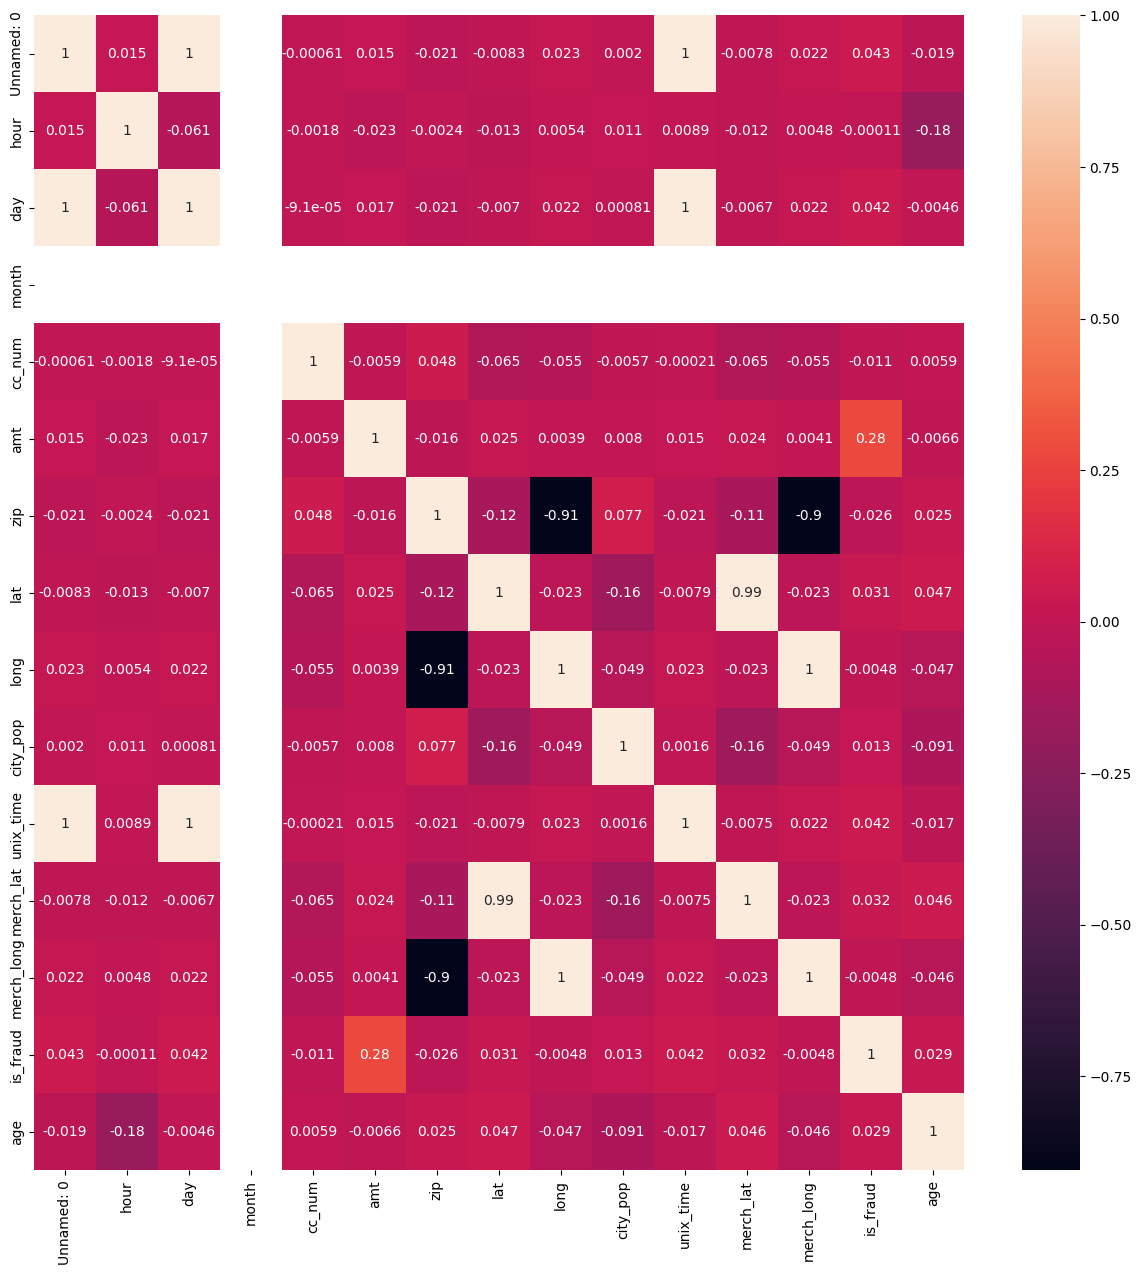

In [70]:
#Correlation
corr = Train_data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot = True)
plt.show()

# Distribution


In [71]:
# Dropping columns that we will not use
Train_data = Train_data.drop(columns=["Unnamed: 0", "trans_date", "trans_time","first", "last", "street", "city", "state", "zip", "job", "trans_num"])
Train_data.head(5)

,hour,day,month,weekday,cc_num,merchant,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,age_group
0,0,1,1,Tuesday,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0.0,30,30-34
1,0,1,1,Tuesday,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0.0,40,40-44
2,0,1,1,Tuesday,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0.0,57,55-59
3,0,1,1,Tuesday,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0.0,52,50-54
4,0,1,1,Tuesday,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0.0,32,30-34


## Geographic Analysis

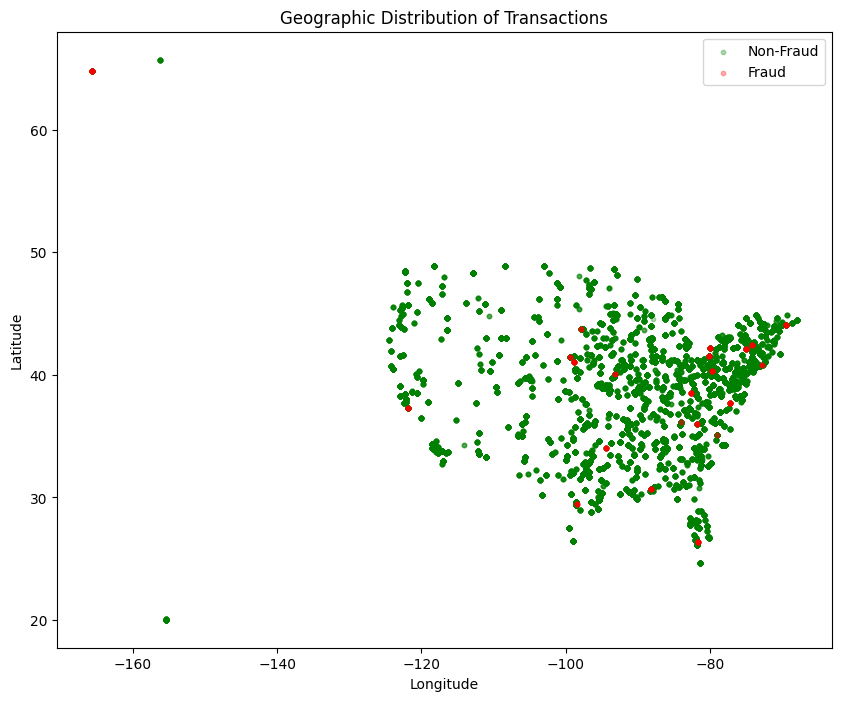

In [72]:
#scatter plot for long vs lat
plt.figure(figsize=(10,8))
plt.scatter(Train_data.loc[Train_data["is_fraud"]==0, "long"],
            Train_data.loc[Train_data["is_fraud"]==0, "lat"],
            color="green", alpha=0.3, s=10, label="Non-Fraud")

plt.scatter(Train_data.loc[Train_data["is_fraud"]==1, "long"],
            Train_data.loc[Train_data["is_fraud"]==1, "lat"],
            color="red", alpha=0.3, s=10, label="Fraud")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Transactions")
plt.legend()
plt.show()

In [73]:
#10000 transactions location
sample_data = Train_data.sample(n=10000, random_state=42)
fig = px.scatter_mapbox(sample_data,
                        lat="lat", lon="long",
                        color="is_fraud",
                        hover_name="merchant",
                        hover_data=["amt", "category"],
                        zoom=3, height=700,
                        color_continuous_scale=["green","red"])

fig.update_layout(mapbox_style="open-street-map")
fig.show()

# Preprocessing

## Importing

## Encoding

In [74]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

#Find all category cloumns
categorical_columns = Train_data.select_dtypes(include=['object','category']).columns.tolist()
print(categorical_columns)

['weekday', 'merchant', 'category', 'gender', 'age_group']


In [75]:
#The goal is to see which features have low or high cardinality
print("Features and their number of unique values:")
print("")

#Value Counts of Category datatypes
weekday = Train_data['weekday'].value_counts() #Low cardinality
age_group = Train_data['age_group'].value_counts() #low cardinality

#Value Counts of Object datatypes
merchant = Train_data['merchant'].value_counts() #High cardinality
category = Train_data['category'].value_counts() #Low cardinality
gender = Train_data['gender'].value_counts() #Low cardinality

print("weekday: ", len(weekday))
print("merchant: ", len(merchant))
print("category: ", len(category))
print("gender: ", len(gender))
print("age_group: ", len(age_group))

categorical_columns_length = [len(weekday), len(merchant), len(category), len(gender), len(age_group)]


Features and their number of unique values:

weekday:  7
merchant:  693
category:  14
gender:  2
age_group:  17


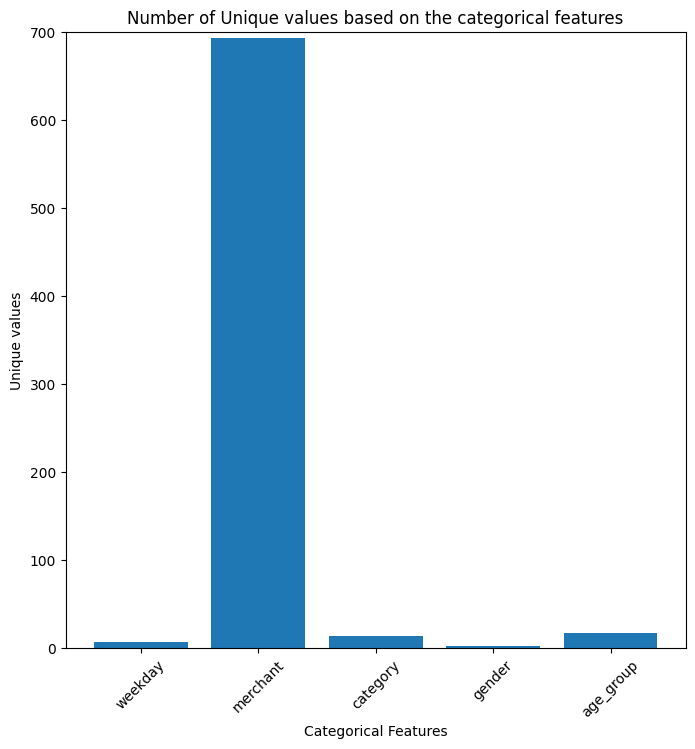

In [76]:
plt.figure(figsize=(8,8))
#sns.barplot(x=categorical_columns, y=categorical_columns_length)
plt.bar(categorical_columns, categorical_columns_length)
plt.ylim(0, 700)
plt.xticks(rotation=45)
plt.title("Number of Unique values based on the categorical features")
plt.ylabel("Unique values")
plt.xlabel("Categorical Features")
plt.show()

In [77]:
#Encode merchant column
# Calculate frequencies
merchant_map = Train_data['merchant'].value_counts().to_dict()
# Apply frequency encoding
Train_data['merchant_Encoded'] = Train_data['merchant'].map(merchant_map)

# Dropping merchant column that we will not use
Train_data = Train_data.drop(columns=["merchant"])
Train_data.head(5)


,hour,day,month,weekday,cc_num,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,age_group,merchant_Encoded
0,0,1,1,Tuesday,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0.0,30,30-34,30
1,0,1,1,Tuesday,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0.0,40,40-44,38
2,0,1,1,Tuesday,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0.0,57,55-59,26
3,0,1,1,Tuesday,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0.0,52,50-54,37
4,0,1,1,Tuesday,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0.0,32,30-34,30


In [78]:
#Encode cc_num column
# Calculate frequencies
cc_num_map = Train_data['cc_num'].value_counts().to_dict()
print(len(cc_num_map))
# Apply frequency encoding
Train_data['cc_num_Encoded'] = Train_data['cc_num'].map(cc_num_map)

# Dropping merchant column that we will not use
Train_data = Train_data.drop(columns=["cc_num"])
Train_data.head(5)


909


,hour,day,month,weekday,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,age_group,merchant_Encoded,cc_num_Encoded
0,0,1,1,Tuesday,misc_net,4.97,F,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0.0,30,30-34,30,43
1,0,1,1,Tuesday,grocery_pos,107.23,F,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0.0,40,40-44,38,63
2,0,1,1,Tuesday,entertainment,220.11,M,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0.0,57,55-59,26,10
3,0,1,1,Tuesday,gas_transport,45.00,M,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0.0,52,50-54,37,6
4,0,1,1,Tuesday,misc_pos,41.96,M,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0.0,32,30-34,30,42


In [79]:
from sklearn.preprocessing import LabelEncoder

# Initialize and fit LabelEncoder
le = LabelEncoder()
Train_data['weekday_Encoded'] = le.fit_transform(Train_data['weekday'])
weekday_map = le.classes_
print("Category Mapping:", weekday_map)

# Dropping age_group column that we will not use
Train_data = Train_data.drop(columns=["weekday"])
Train_data.head(5)

Category Mapping: ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']


,hour,day,month,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,age_group,merchant_Encoded,cc_num_Encoded,weekday_Encoded
0,0,1,1,misc_net,4.97,F,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0.0,30,30-34,30,43,5
1,0,1,1,grocery_pos,107.23,F,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0.0,40,40-44,38,63,5
2,0,1,1,entertainment,220.11,M,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0.0,57,55-59,26,10,5
3,0,1,1,gas_transport,45.00,M,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0.0,52,50-54,37,6,5
4,0,1,1,misc_pos,41.96,M,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0.0,32,30-34,30,42,5


In [80]:
# Initialize and fit LabelEncoder
le = LabelEncoder()
Train_data['age_group_Encoded'] = le.fit_transform(Train_data['age_group'])
age_group_map = le.classes_
print("Category Mapping:", age_group_map)

# Dropping age_group column that we will not use
Train_data = Train_data.drop(columns=["age_group"])
Train_data.head(5)

Category Mapping: ['15-19' '20-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59'
 '60-64' '65-69' '70-74' '75-79' '80-84' '85-89' '90-94' nan]


,hour,day,month,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,merchant_Encoded,cc_num_Encoded,weekday_Encoded,age_group_Encoded
0,0,1,1,misc_net,4.97,F,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0.0,30,30,43,5,3
1,0,1,1,grocery_pos,107.23,F,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0.0,40,38,63,5,5
2,0,1,1,entertainment,220.11,M,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0.0,57,26,10,5,8
3,0,1,1,gas_transport,45.00,M,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0.0,52,37,6,5,7
4,0,1,1,misc_pos,41.96,M,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0.0,32,30,42,5,3


In [81]:
# Initialize and fit LabelEncoder
le = LabelEncoder()
Train_data['gender_Encoded'] = le.fit_transform(Train_data['gender'])
gender_map = le.classes_
print("Category Mapping:", gender_map)

# Dropping age_group column that we will not use
Train_data = Train_data.drop(columns=["gender"])
Train_data.head(5)

Category Mapping: ['F' 'M']


,hour,day,month,category,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,merchant_Encoded,cc_num_Encoded,weekday_Encoded,age_group_Encoded,gender_Encoded
0,0,1,1,misc_net,4.97,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0.0,30,30,43,5,3,0
1,0,1,1,grocery_pos,107.23,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0.0,40,38,63,5,5,0
2,0,1,1,entertainment,220.11,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0.0,57,26,10,5,8,1
3,0,1,1,gas_transport,45.00,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0.0,52,37,6,5,7,1
4,0,1,1,misc_pos,41.96,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0.0,32,30,42,5,3,1


In [82]:
from sklearn.preprocessing import OneHotEncoder

# Initialize and fit OHE
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(Train_data[["category"]])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(["category"]))

#Join encodedcolumns with Train_data dataset
Train_data = pd.concat([Train_data, one_hot_df], axis=1)


# Dropping age_group columns that we will not use
Train_data = Train_data.drop(["category"], axis=1)
Train_data.head(10)

,hour,day,month,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,1,1,4.97,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,107.23,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,220.11,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,45.00,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,41.96,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0,1,1,94.63,40.3750,-75.2045,2158,1325376248,40.653382,-76.152667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,1,1,44.54,37.9931,-100.9893,2691,1325376282,37.162705,-100.153370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,1,1,71.65,38.8432,-78.6003,6018,1325376308,38.948089,-78.540296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,1,1,4.27,40.3359,-79.6607,1472,1325376318,40.351813,-79.958146,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0,1,1,198.39,36.5220,-87.3490,151785,1325376361,37.179198,-87.485381,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
Train_data

,hour,day,month,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,1,1,4.97,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,107.23,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,220.11,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,45.00,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,41.96,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23362,17,14,1,2.88,41.3851,-80.1752,606,1326563587,42.093058,-79.510755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23363,17,14,1,19.09,38.0828,-76.3477,313,1326563609,37.542701,-75.893037,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23364,17,14,1,114.06,34.0480,-85.9246,67082,1326563653,34.581678,-86.014739,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23365,17,14,1,16.33,32.1530,-90.1217,19685,1326563674,32.774707,-91.096222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [84]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23367 entries, 0 to 23366
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hour                     23367 non-null  int32  
 1   day                      23367 non-null  int32  
 2   month                    23367 non-null  int32  
 3   amt                      23367 non-null  float64
 4   lat                      23367 non-null  float64
 5   long                     23367 non-null  float64
 6   city_pop                 23367 non-null  int64  
 7   unix_time                23367 non-null  int64  
 8   merch_lat                23367 non-null  float64
 9   merch_long               23367 non-null  float64
 10  is_fraud                 23366 non-null  float64
 11  age                      23367 non-null  int64  
 12  merchant_Encoded         23367 non-null  int64  
 13  cc_num_Encoded           23367 non-null  int64  
 14  weekday_Encoded       

# Standardization
### - outliers can cause poor performs especially in models such as neural networks
### - using standard scaler will allow us to set a standard deviation of 1 and a mean of zero for every feature

The following features contain outliers and will need to be scaled:

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Number of amt outliers:
296


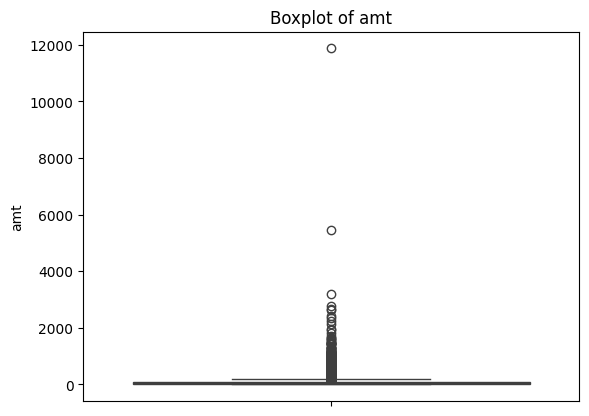


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Number of lat outliers:
112


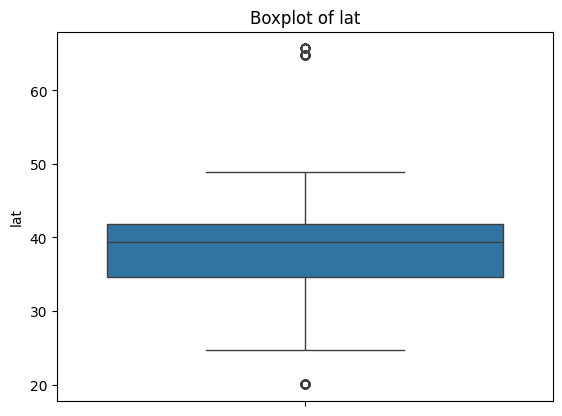


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Number of long outliers:
112


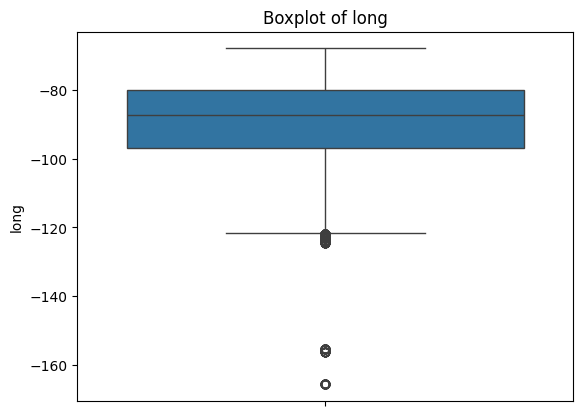


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Number of city_pop outliers:
619


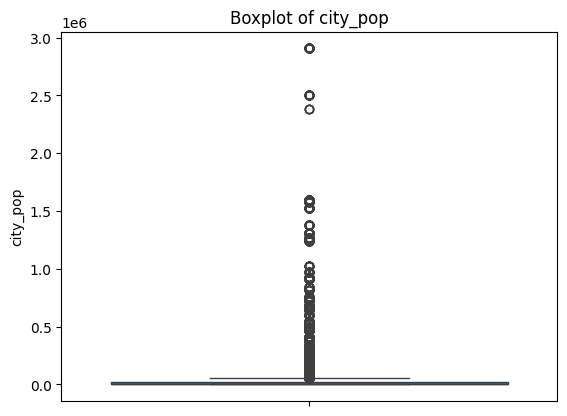


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Number of merch_lat outliers:
112


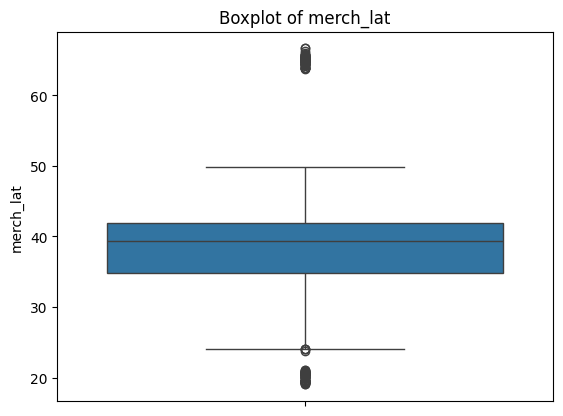


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Number of merch_long outliers:
112


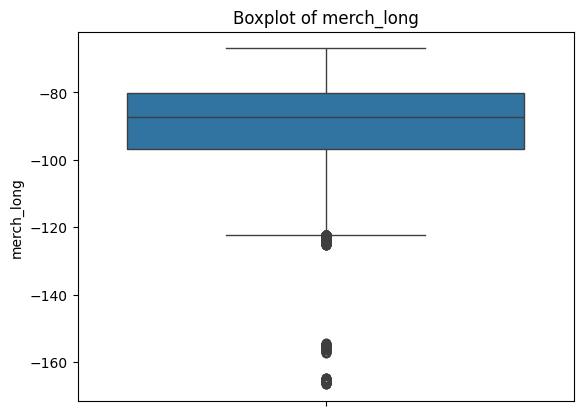


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Number of merchant_Encoded outliers:
151


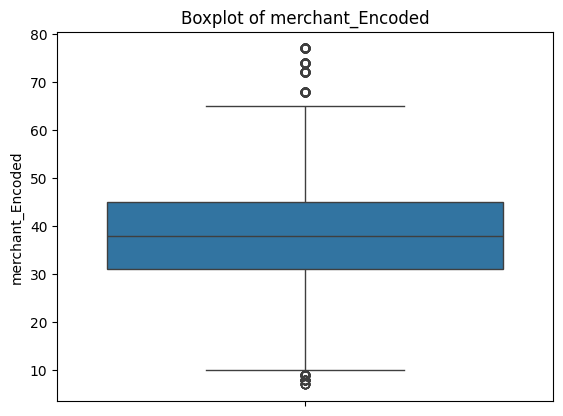

In [85]:
#Detect outliers
from scipy import stats
import numpy as np

threshold_z = 3
print("The following features contain outliers and will need to be scaled:")
print()
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
z = np.abs(stats.zscore(Train_data['amt']))
outlier_indices = np.where(z > threshold_z)[0]
print("Number of amt outliers:")
print(len(outlier_indices))
sns.boxplot(Train_data['amt'])
plt.title('Boxplot of amt')
plt.show()


print()
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
z = np.abs(stats.zscore(Train_data['lat']))
outlier_indices = np.where(z > threshold_z)[0]
print("Number of lat outliers:")
print(len(outlier_indices))
sns.boxplot(Train_data['lat'])
plt.title('Boxplot of lat')
plt.show()

print()
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
z = np.abs(stats.zscore(Train_data['long']))
outlier_indices = np.where(z > threshold_z)[0]
print("Number of long outliers:")
print(len(outlier_indices))
sns.boxplot(Train_data['long'])
plt.title('Boxplot of long')
plt.show()

print()
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
z = np.abs(stats.zscore(Train_data['city_pop']))
outlier_indices = np.where(z > threshold_z)[0]
print("Number of city_pop outliers:")
print(len(outlier_indices))
sns.boxplot(Train_data['city_pop'])
plt.title('Boxplot of city_pop')
plt.show()

print()
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
z = np.abs(stats.zscore(Train_data['merch_lat']))
outlier_indices = np.where(z > threshold_z)[0]
print("Number of merch_lat outliers:")
print(len(outlier_indices))
sns.boxplot(Train_data['merch_lat'])
plt.title('Boxplot of merch_lat')
plt.show()

print()
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
z = np.abs(stats.zscore(Train_data['merch_long']))
outlier_indices = np.where(z > threshold_z)[0]
print("Number of merch_long outliers:")
print(len(outlier_indices))
sns.boxplot(Train_data['merch_long'])
plt.title('Boxplot of merch_long')
plt.show()

print()
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
z = np.abs(stats.zscore(Train_data['merchant_Encoded']))
outlier_indices = np.where(z > threshold_z)[0]
print("Number of merchant_Encoded outliers:")
print(len(outlier_indices))
sns.boxplot(Train_data['merchant_Encoded'])
plt.title('Boxplot of merchant_Encoded')
plt.show()




### The following features contain outliers and will need to be scaled:
#### amt, lat, long, city_pop, merch_lat, merch_long, merchant_Encoded  

In [86]:
#numerical_cols=Train_data.select_dtypes(include=['float64','int64']).columns.tolist()
specific=['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
ss=StandardScaler()
scaled=ss.fit_transform(Train_data[specific].to_numpy())
scaled_df=pd.DataFrame(scaled,columns=specific)

#Remove the following features: 'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long','merchant_Encoded'
Train_data = Train_data.drop(columns=['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long'])

#Concat Train_data and scaled_df
Train_data=pd.concat([Train_data,scaled_df],axis=1)



In [87]:
# from sklearn.preprocessing import MinMaxScaler
# ms=MinMaxScaler()
# scaled=ms.fit_transform(Train_data[specific].to_numpy())
# scaled_df=pd.DataFrame(scaled,columns=specific)

# #Remove the following features: 'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long','merchant_Encoded'
# Train_data = Train_data.drop(columns=['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long','cc_number'])

# #Concat Train_data and scaled_df
# Train_data=pd.concat([Train_data,scaled_df],axis=1)

In [88]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23367 entries, 0 to 23366
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hour                     23367 non-null  int32  
 1   day                      23367 non-null  int32  
 2   month                    23367 non-null  int32  
 3   unix_time                23367 non-null  int64  
 4   is_fraud                 23366 non-null  float64
 5   age                      23367 non-null  int64  
 6   merchant_Encoded         23367 non-null  int64  
 7   cc_num_Encoded           23367 non-null  int64  
 8   weekday_Encoded          23367 non-null  int64  
 9   age_group_Encoded        23367 non-null  int64  
 10  gender_Encoded           23367 non-null  int64  
 11  category_entertainment   23367 non-null  float64
 12  category_food_dining     23367 non-null  float64
 13  category_gas_transport   23367 non-null  float64
 14  category_grocery_net  

## Feature Selection

In [89]:
#Move "isfraud" to the back so its the last feature in the dataset.

#Store "is_fraud" feature in a varialbe
isfraud = Train_data["is_fraud"]
#Drop "is_fraud" feature from Train_data
Train_data = Train_data.drop(columns=["is_fraud"])

#Add "is_fraud" feature to the end of Train_data
Train_data["is_fraud"] = isfraud

Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23367 entries, 0 to 23366
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hour                     23367 non-null  int32  
 1   day                      23367 non-null  int32  
 2   month                    23367 non-null  int32  
 3   unix_time                23367 non-null  int64  
 4   age                      23367 non-null  int64  
 5   merchant_Encoded         23367 non-null  int64  
 6   cc_num_Encoded           23367 non-null  int64  
 7   weekday_Encoded          23367 non-null  int64  
 8   age_group_Encoded        23367 non-null  int64  
 9   gender_Encoded           23367 non-null  int64  
 10  category_entertainment   23367 non-null  float64
 11  category_food_dining     23367 non-null  float64
 12  category_gas_transport   23367 non-null  float64
 13  category_grocery_net     23367 non-null  float64
 14  category_grocery_pos  

In [90]:
Train_data.dropna(inplace=True)

In [91]:
isfraud
#X.select_dtypes(include=['float64','int64']).columns.tolist()

,is_fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
23362,0.0
23363,0.0
23364,0.0
23365,0.0


In [92]:
# you will need to install imblearn
#!pip install imblearn

# SMOTE Implementation
#### -Synthetic Minority Oversampling Technique (SMOTE) will handle imbalanced data by generating samples of the minority class.

In [93]:
import imblearn
from imblearn.over_sampling import SMOTE
# Synthetic Minority Oversampling Technique call.
sm=SMOTE()
y= isfraud.dropna()
# define the input features
X = Train_data.drop(['is_fraud'],axis=1)
X.dropna(inplace=True)
# since it can only resample numerical drop the categorical columns
numerical_cols=X.select_dtypes(include=['float64','int64']).columns.tolist()
X=X[numerical_cols]

# fit the SMOTE function
X,y=sm.fit_resample(X,y)
# X

In [94]:
from sklearn.feature_selection import r_regression

N = len(X.columns)

r_coefs = r_regression(X,y)#compute the pearson correlation for each feature
print(X.columns[1])
r_dict = {}
for i in range(N):
    r_dict[X.columns[i]] = [r_coefs[i]]

pd.set_option('display.max_columns', None)

r_coefs_df = pd.DataFrame(r_dict)
r_coefs_df.head()

age


,unix_time,age,merchant_Encoded,cc_num_Encoded,weekday_Encoded,age_group_Encoded,gender_Encoded,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,amt,lat,long,city_pop,merch_lat,merch_long
0,0.232869,0.123629,0.029523,-0.163936,-0.016478,0.058831,-0.192935,-0.102142,-0.127142,-0.012476,-0.054853,0.245021,-0.125443,-0.191679,-0.10828,0.164713,-0.067388,-0.192148,0.236666,0.011078,-0.039772,0.675367,0.127383,-0.007557,0.069425,0.129719,-0.007084


#### No features will be pruned because modern machine learning languages can handle 31 features

# Validation Split

In [95]:
# Train test split for validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


# Model Training

In [96]:
# Use decision trees as a baseline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),learning_rate=0.5,n_estimators=100)
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      4636
         1.0       0.95      0.93      0.94      4632

    accuracy                           0.94      9268
   macro avg       0.94      0.94      0.94      9268
weighted avg       0.94      0.94      0.94      9268



In [97]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4636
         1.0       0.99      0.99      0.99      4632

    accuracy                           0.99      9268
   macro avg       0.99      0.99      0.99      9268
weighted avg       0.99      0.99      0.99      9268



# K-Fold Cross Validation

In [98]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, y_test, cv=5)
print(scores)


[0.99406688 0.99352751 0.99352751 0.98327037 0.99244468]


# Deep Learning Model Development


In [99]:
#!pip install tensorflow

# Tensorflow library Import

In [100]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import datasets, layers, models
from keras import utils

tf.random.set_seed(43)

In [109]:
# connect to gpu since neural networks are computationally expensive.

gpu_available = tf.config.list_physical_devices('GPU')
if gpu_available:
    print("GPU is available and being used.")
else:
    print("GPU is not available or not being used.")
# Best Neural Network Model 97% accuracy.
model = keras.Sequential()
# first layer with 128 neurons
model.add(layers.GRU(128, return_sequences=True, input_shape = [X_train.shape[1],1]))
# drop out to reduce overfitting
model.add(Dropout(0.5))
# second layer
model.add(layers.GRU(128,return_sequences=True))
model.add(Dropout(0.5))
model.add(layers.GRU(128,return_sequences=True))
model.add(Dropout(0.5))
model.add(layers.GRU(128,))
model.add(Dropout(0.5))
# output layer
model.add(layers.Dense(1))
opt =keras.optimizers.Adamax()
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.1)



GPU is available and being used.
Epoch 1/100
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7834 - loss: 0.5657 - val_accuracy: 0.8242 - val_loss: 0.4640
Epoch 2/100
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8085 - loss: 0.4634 - val_accuracy: 0.8428 - val_loss: 0.4663
Epoch 3/100
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8259 - loss: 0.4756 - val_accuracy: 0.8439 - val_loss: 0.4555
Epoch 4/100
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8289 - loss: 0.4651 - val_accuracy: 0.8584 - val_loss: 0.4485
Epoch 5/100
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8455 - loss: 0.4705 - val_accuracy: 0.8689 - val_loss: 0.4269
Epoch 6/100
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8563 - loss: 0.4661 - val_accuracy: 0.8457 - val_loss: 0.4089
Epoch 7/100
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8489 - loss: 0.4251 - val_accuracy: 0.8757 - val_loss: 0.4167
Epoch 8/100
1043/1043 ━━━━━━━━━━━━━━

In [110]:
# evaluation function
pred=[]
predictions=model.predict(X_test)
for i in predictions :
    if i >= 0.5:
        pred.append(1)
    else:
        pred.append(0)



print(classification_report(y_test,pred))

290/290 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96      4636
         1.0       0.96      0.97      0.96      4632

    accuracy                           0.96      9268
   macro avg       0.96      0.96      0.96      9268
weighted avg       0.96      0.96      0.96      9268



# Loss and Accuracy Per Epoch

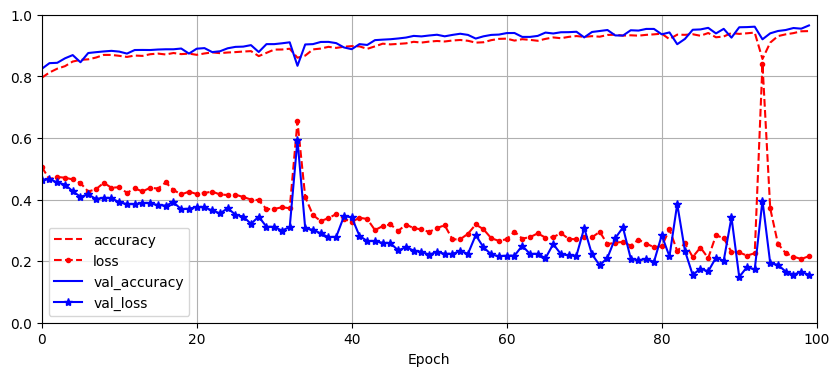

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
 figsize=(10, 4), xlim=[0, 100], ylim=[0, 1], grid=True,
xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [114]:
!pip install pyngrok
! pip install mlflow

import mlflow

# mlflow.set_experiment("fraud_detection")
# mlflow.set_tracking_uri("http://localhost:5000")




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.1/329.1 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.2/738.2 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72

In [116]:
from sklearn.metrics import f1_score,precision_recall_curve,precision_score,PrecisionRecallDisplay,roc_auc_score,roc_curve,RocCurveDisplay,recall_score

f1=f1_score(y_test,pred)
precision = precision_score(y_test,pred)
roc_auc = roc_auc_score(y_test,pred)
recall = recall_score(y_test,pred)
# run only once
mlflow.create_experiment('Credit-Fraud-Detection')
experiment_id=mlflow.get_experiment_by_name('Credit-Fraud-Detection').experiment_id

In [123]:

with mlflow.start_run(run_name="GRU", nested=True, experiment_id=experiment_id):
    # Log some metrics
    mlflow.log_param("optimizer",opt)
    mlflow.log_param("n_hidden",4)
    mlflow.log_param("n_neurons",128)
    mlflow.log_metric("f1",  f1)
    mlflow.log_metric("recall",recall)
    mlflow.log_metric("precision",precision )

In [124]:
get_ipython().system_raw("mlflow ui --port 5000 &")

In [125]:
from pyngrok import ngrok
from getpass import getpass
# Terminate open tunnels if any exist
ngrok.kill()

In [126]:
get_ipython().system_raw("mlflow ui --port 5000 &")
##Login on ngrok.com or https://dashboard.ngrok.com/login and get your authtoken from https://dashboard.ngrok.com/auth

ngrok_auth_token=getpass("Enter your authentication token")
ngrok.set_auth_token(ngrok_auth_token)
tunnel=ngrok.connect(addr="5000",proto="http",bind_tls=True)
print("MLflow Tracking UI:", tunnel.public_url)

Enter your authentication token··········
MLflow Tracking UI: https://5e2d64ff97e6.ngrok-free.app
